## 学习内容

1. 相关概念（无监督学习、聚类的定义）  
2. 性能度量(外部指标、内部指标)  
3. 距离计算  
4. 原型聚类  
    K均值  
    LVQ  
    高斯混合聚类  
5. 层次聚类  
    AGNES  
    自顶而下  
6. 密度聚类  
    DBSCAN  
    其他密度聚类算法  
7. 优缺点  
8. sklearn参数详解  

### 1.相关概念
* 无监督学习：
    无监督学习是机器学习的一种方法，没有给定事先标记过的训练示例，自动对输入的数据进行分类或分群。无监督学习的主要运用包含：聚类分析、关系规则、维度缩减。它是监督式学习和强化学习等策略之外的一种选择。 一个常见的无监督学习是数据聚类。在人工神经网络中，生成对抗网络、自组织映射和适应性共振理论则是最常用的非监督式学习。
* 聚类：
    聚类是一种无监督学习。聚类是把相似的对象通过静态分类的方法分成不同的组别或者更多的子集，这样让在同一个子集中的成员对象都有相似的一些属性，常见的包括在坐标系中更加短的空间距离等。  

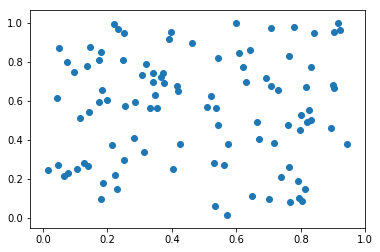

In [682]:
# 通过简单的例子来直接查看K均值聚类的效果
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


# 聚类前
X = np.random.rand(100, 2)
plt.scatter(X[:, 0], X[:, 1], marker='o')

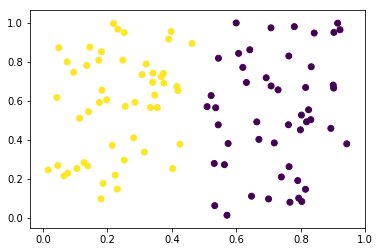

In [683]:

#聚类后
kmeans = KMeans(n_clusters=2).fit(X)
label_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()

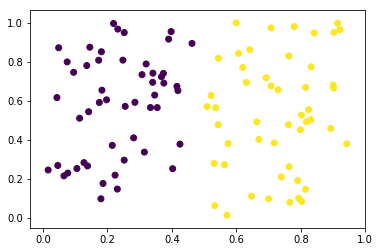

In [684]:
#聚类后
kmeans = KMeans(n_clusters=2).fit(X)
label_pred = kmeans.labels_
plt.scatter(X[:, 0], X[:, 1], c=label_pred)
plt.show()

### 2.性能度量
在机器学习中我们都需要对任务进行评价以便于进行下一步的优化，聚类的性能度量主要有一下两种。
* 外部指标：是指把算法得到的划分结果跟某个外部的“参考模型”（如专家给出的划分结果）比较
* 内部指标：是指直接考察聚类结果，不利用任何参考模型的指标。

### 3.距离计算
在机器学习和数据挖掘中，我们经常需要知道个体间差异的大小，进而评价个体的相似性和类别。
* 欧式距离（2-norm距离）
* 曼哈顿距离（Manhattan distance, 1-norm距离）
* 切比雪夫距离
* 闵可夫斯基距离
* 余弦相似性
* 马氏距离

欧式距离:欧氏距离是最易于理解的一种距离计算方法，源自欧氏空间中两点间的距离公式。
$$d(x,y)=\sqrt{\Sigma_{k=1}^n (x_k-y_k)^2}$$

曼哈顿距离:
曼哈顿距离也称为街区距离，计算公式如下：
$$d(x,y)=\Sigma_{k=1}^n \left|x_k-y_k\right|$$

切比雪夫距离：$$d(x,y) = \lim_{n\rightarrow \infty} (\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r} = max_k (\left|x_k-y_k\right|)$$

闵可夫斯基距离:
$$d(x,y)=(\Sigma_{k=1}^n (\left|x_k-y_k\right|)^r)^\dfrac{1}{r}$$
式中，r是一个可变参数，根据参数r取值的不同，闵可夫斯基距离可以表示一类距离  
  r = 1时，为曼哈顿距离  
  r = 2时，为欧式距离  
  r →∞时，为切比雪夫距离  
闵可夫斯基距离包括欧式距离、曼哈顿距离、切比雪夫距离都假设数据各维属性的量纲和分布（期望、方差）相同，因此适用于度量独立同分布的数据对象。

余弦距离:  
  余弦相似度公式定义如下：
$$cos⁡(x,y)=\dfrac{xy}{\left|x\right|\left|y\right|} = \dfrac{\Sigma_{k=1}^n x_k y_k}{\sqrt{\Sigma_{k=1}^n x_k^2} \sqrt{\Sigma_{k=1}^n y_k^2}}$$

余弦相似度实际上是向量xx和yy夹角的余弦度量，可用来衡量两个向量方向的差异。如果余弦相似度为11，则xx和yy之间夹角为0°0°，两向量除模外可认为是相同的；如果预先相似度为00，则xx和yy之间夹角为90°90°，则认为两向量完全不同。在计算余弦距离时，将向量均规范化成具有长度11，因此不用考虑两个数据对象的量值。
余弦相似度常用来度量文本之间的相似性。文档可以用向量表示，向量的每个属性代表一个特定的词或术语在文档中出现的频率，尽管文档具有大量的属性，但每个文档向量都是稀疏的，具有相对较少的非零属性值。

马氏距离:  
$$mahalanobis(x,y)=(x-y)\Sigma^{-1}(x-y)^T$$
式中，Σ−1Σ−1是数据协方差矩阵的逆。
前面的距离度量方法大都假设样本独立同分布、数据属性之间不相关。马氏距离考虑了数据属性之间的相关性，排除了属性间相关性的干扰，而且与量纲无关。若协方差矩阵是对角阵，则马氏距离变成了标准欧式距离；若协方差矩阵是单位矩阵，各个样本向量之间独立同分布，则变成欧式距离。

### 4.原型聚类
    原型聚类亦称"基于原型的聚类" (prototype-based clustering)，此类算法假设聚类结构能通过一组原型刻画，在现实聚类任务中极为常用.通常情形下，算法先对原型进行初始化，然后对原型进行迭代更新求解.采用不同的原型表示、不同的求解方式，将产生不同的算法.
* K均值
* LVQ
* 高斯混合聚类

k均值聚类算法（k-means clustering algorithm）是一种迭代求解的聚类分析算法，其步骤是    
创建 k 个点作为起始质心（通常是随机选择）  
当任意一个点的簇分配结果发生改变时（不改变时算法结束）   
　　对数据集中的每个数据点  
　　　　对每个质心  
　　　　　　计算质心与数据点之间的距离  
　　　　将数据点分配到距其最近的簇  
　　对每一个簇, 计算簇中所有点的均值并将均值作为质心  
聚类中心以及分配给它们的对象就代表一个聚类。  

In [685]:
def distEclud(vecA, vecB):
    '''
    欧氏距离计算函数
    :param vecA:
    :param vecB:
    :return:
    '''
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))


def randCent(dataMat, k):
    '''
    为给定数据集构建一个包含K个随机质心的集合,
    随机质心必须要在整个数据集的边界之内,这可以通过找到数据集每一维的最小和最大值来完成
    然后生成0到1.0之间的随机数并通过取值范围和最小值,以便确保随机点在数据的边界之内
    :param dataMat:
    :param k:
    :return:
    '''
    # 获取样本数与特征值
    m, n = np.shape(dataMat)
    # 初始化质心,创建(k,n)个以零填充的矩阵
    centroids = np.mat(np.zeros((k, n)))
    print(centroids)
    # 循环遍历特征值
    for j in range(n):
        # 计算每一列的最小值
        minJ = np.min(dataMat[:, j])
        # 计算每一列的范围值
        rangeJ = float(np.max(dataMat[:, j]) - minJ)
        # 计算每一列的质心,并将值赋给centroids
        centroids[:, j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))
    # 返回质心
    return centroids.A


def kMeans(dataMat, k, distMeas=distEclud):
    '''
    创建K个质心,然后将每个店分配到最近的质心,再重新计算质心。
    这个过程重复数次,直到数据点的簇分配结果不再改变为止
    :param dataMat: 数据集
    :param k: 簇的数目
    :param distMeans: 计算距离
    :return:
    '''
    # 获取样本数和特征数
    m, n = np.shape(dataMat)
    # 初始化一个矩阵来存储每个点的簇分配结果
    # clusterAssment包含两个列:一列记录簇索引值,第二列存储误差(误差是指当前点到簇质心的距离,后面会使用该误差来评价聚类的效果)
    clusterAssment = np.mat(np.zeros((m, 2)))
    # 创建质心,随机K个质心
    centroids = randCent(dataMat, k)
    # 初始化标志变量,用于判断迭代是否继续,如果True,则继续迭代
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        # 遍历所有数据找到距离每个点最近的质心,
        # 可以通过对每个点遍历所有质心并计算点到每个质心的距离来完成
        for i in range(m):
            minDist = float("inf")
            minIndex = -1
            for j in range(k):
                # 计算数据点到质心的距离
                # 计算距离是使用distMeas参数给出的距离公式,默认距离函数是distEclud
                distJI = distMeas(centroids[j, :], dataMat[i, :])
                # 如果距离比minDist(最小距离)还小,更新minDist(最小距离)和最小质心的index(索引)
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            # 如果任一点的簇分配结果发生改变,则更新clusterChanged标志
            if clusterAssment[i, 0] != minIndex: clusterChanged = True
            # 更新簇分配结果为最小质心的index(索引),minDist(最小距离)的平方
            clusterAssment[i, :] = minIndex, minDist ** 2
        # print(centroids)
        # 遍历所有质心并更新它们的取值
        for cent in range(k):
            # 通过数据过滤来获得给定簇的所有点
            ptsInClust = dataMat[np.nonzero(clusterAssment[:, 0].A == cent)[0]]
            # 计算所有点的均值,axis=0表示沿矩阵的列方向进行均值计算
            centroids[cent, :] = np.mean(ptsInClust, axis=0)
    # 返回所有的类质心与点分配结果
    return centroids, clusterAssment

[[0. 0.]
 [0. 0.]]


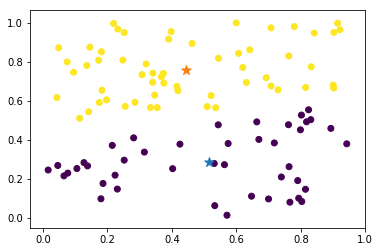

In [686]:
# 运行Kmeans，假设有两聚类中心
center,label_pred = kMeans(X, k=2)

# 将标签转化成易绘图的形式
label = label_pred[:, 0].A.reshape(-1)

# 将结果可视化
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(center[0, 0], center[0, 1], marker="*", s = 100)
plt.scatter(center[1, 0], center[1, 1], marker="*", s = 100)
plt.show()

学习向量量化(Learning Vector Quantization,简称LVQ)属于原型聚类，即试图找到一组原型向量来聚类，每个原型向量代表一个簇，将空间划分为若干个簇，从而对于任意的样本，可以将它划入到它距离最近的簇中，不同的是LVQ假设数据样本带有类别标记，因此可以利用这些类别标记来辅助聚类。

In [717]:
def LVQ(X, y, k = 2, max_time=10000, ita=0.01):
    # 初始化一组原型向量
    init_index = np.random.choice(len(y), k)
    px = X[init_index]
    py = y[init_index]
    print(px,py)
    for n in range(max_time):
        # 从样本集随机选择样本
        j = np.random.choice(len(y), 1)
        xj, yj = X[j], y[j]
        # 计算并找出与样本最接近的原型向量
        i = np.argmin([np.linalg.norm(xj - pi) for pi in px])
        pyi = py[i]
        # 更新原型向量
        if pyi == yj:
            px[i] = px[i] + ita * (xj - px[i])
        else:
            px[i] = px[i] - ita * (xj - px[i])
        if n % 1000 == 0:
            plt.scatter(px[:, 0], px[:, 1], marker=".", s = 100)

    return px

[[0.23221959 0.96707854]
 [0.8149985  0.66763096]] [0 1]


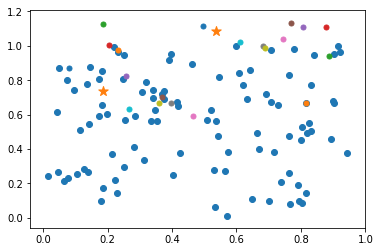

In [718]:
plt.scatter(X[:, 0], X[:, 1])
P = LVQ(X, np.random.randint(0, 2, len(X)))
plt.scatter(P[:, 0], P[:, 1], marker="*", s = 100)
plt.show()

高斯混合聚类：高斯混合聚类与k均值、LVQ用原型向量来刻画聚类结构不同，高斯混合聚类采用概率模型来表达聚类原型。相对于k均值聚类算法使用 k 个原型向量来表达聚类结构，高斯混合聚类使用 k 个高斯概率密度函数混合来表达聚类结构

于是迭代更新 k 个簇原型向量的工作转换为了迭代更新 k 个高斯概率密度函数的任务。每个高斯概率密度函数代表一个簇，当一个新的样本进来时，我们可以通过这 k 的函数的值来为新样本分类

### 5.层次聚类
   层次聚类(hierarchical clustering)基于簇间的相似度在不同层次上分析数据，从而形成树形的聚类结构，层次聚类一般有两种划分策略：自底向上的聚合（agglomerative）策略和自顶向下的分拆（divisive）策略
* AGNES
* 自顶而下

AGNES算法是自底向上的层次聚类算法。开始时将数据集中的每个样本初始化为一个簇，然后找到距离最近的两个簇，将他们合并，不断重复这个过程，直达到到预设的聚类数目为止。

簇间距离的计算可以有三种形式：  
最小距离：$d_{min}(C_i,C_j)=\min_{p\in C_i,q\in C_j}|p-q|.$  
最大距离：$d_{max}(C_i,C_j)=\max_{p\in C_i,q\in C_j}|p-q|.$  
平均距离：$d_{avg}(C_i,C_j)=\frac{1}{|C_i||C_j|}\sum_{p\in C_i}\sum_{q\in C_j}|p-q|.$  
```
输入：样本集D={x1,x2,...,xm}D={x1,x2,...,xm}
   聚类簇距离度量函数dd；
   聚类簇数kk
过程：
1. for j=1,2,...,mj=1,2,...,m do
2.  Cj={xj}Cj={xj}
3. end for
4. for i=1,2,...,mi=1,2,...,m do
5.  for i=1,2,...,mi=1,2,...,m do
6.   M(i,j)=d(Ci,Cj)M(i,j)=d(Ci,Cj);
7.   M(j,i)=M(i,j)M(j,i)=M(i,j);
8.  end for
9. end for
10. 设置当前聚类簇个数：q=mq=m;
11. while q>kq>k do
12.  找出距离最近的两个聚类簇Ci∗Ci∗和Cj∗Cj∗;
13.  合并Ci∗Ci∗和Cj∗Cj∗：Ci∗=Ci∗⋃Cj∗Ci∗=Ci∗⋃Cj∗；
14.  for j=j∗+1,j∗+2,..,qj=j∗+1,j∗+2,..,q do
15.   将聚类簇CjCj重新编号为CjCj
16.  end for
17.  删除距离矩阵MM的第j∗j∗行和第j∗j∗列;
18.  for j=1,2,...,q−1j=1,2,...,q−1 do
19.   M(i,j)=d(Ci,Cj)M(i,j)=d(Ci,Cj);
20.   M(j,i)=M(i,j)M(j,i)=M(i,j);
21.  end for
22.  q=q−1q=q−1
23. end while
输出：簇划分:C={C1,C2,...,Ck}
```

In [724]:
#dist_min
def dist_min(Ci, Cj):
    return np.min(distEclud(i, j) for i in Ci for j in Cj)
#dist_max
def dist_max(Ci, Cj):
    return np.max(dist(i, j) for i in Ci for j in Cj)
#dist_avg
def dist_avg(Ci, Cj):
    return sum(dist(i, j) for i in Ci for j in Cj)/(len(Ci)*len(Cj))
#找到距离最小的下标
def find_Min(M):
    min_i = 1000
    x = 0; y = 0
    for i in range(len(M)):
        for j in range(len(M[i])):
            print(M[i][j], min_i)
            if (i != j) and (
                M[i][j] < min_i):
                min_i = M[i][j];x = i; y = j
    return (x, y, min_i)

In [729]:
def AGNES(dataset, dist, k):
    #初始化C和M
    C = [];M = []
    # 初始化单样本聚类簇
    for i in dataset:
        Ci = []
        Ci.append(i)
        C.append(Ci)
    # 初始化聚类簇距离矩阵
    print(C)
    for i in C:
        Mi = []
        for j in C:
            Mi.append(dist(i, j))
            print("Mi:", Mi)
        M.append(Mi)
    # 设置当前聚类簇个数
    print(M)
    q = len(dataset)
    #合并更新
    while q > k:
        # 找出距离最近的两个聚类簇
        x, y, min_i = find_Min(M)
       # print(x, y, min)
        # 合并两个聚类簇
        #print(C[x])
        C[x].extend(C[y])
        #print(C[x])
        #print("C:",C)
        # 移除被合并的聚类簇
        #print("1",np.delete(C, C[y]))
        C = np.delete(C, C[y])
        #print("c",C)
        M = []
        for i in C:
            Mi = []
            for j in C:
                Mi.append(dist(i, j))
            M.append(Mi)
        q -= 1
    return C

In [733]:
P = AGNES(dataset=X[:10], dist = dist_min, k=2)
P

[[array([0.7178745 , 0.38317664])], [array([0.34120525, 0.74106636])], [array([0.24802623, 0.80781142])], [array([0.62010667, 0.77063086])], [array([0.82421382, 0.55327572])], [array([0.64714108, 0.11001742])], [array([0.39003908, 0.91571709])], [array([0.18304062, 0.65384532])], [array([0.25514891, 0.57076165])], [array([0.79361508, 0.09975921])]]
Mi: [<generator object dist_min.<locals>.<genexpr> at 0x000000000E9F25E8>]
Mi: [<generator object dist_min.<locals>.<genexpr> at 0x000000000E9F25E8>, <generator object dist_min.<locals>.<genexpr> at 0x000000000E9F2660>]
Mi: [<generator object dist_min.<locals>.<genexpr> at 0x000000000E9F25E8>, <generator object dist_min.<locals>.<genexpr> at 0x000000000E9F2660>, <generator object dist_min.<locals>.<genexpr> at 0x000000000E9F26D8>]
Mi: [<generator object dist_min.<locals>.<genexpr> at 0x000000000E9F25E8>, <generator object dist_min.<locals>.<genexpr> at 0x000000000E9F2660>, <generator object dist_min.<locals>.<genexpr> at 0x000000000E9F26D8>,

TypeError: '<' not supported between instances of 'generator' and 'int'

自顶而下：把整个数据集视作一个簇，然后把一个簇分成几个簇，接着再分别把每一个簇分成更小的簇，如此反复下去，直到满足要求为止。

### 6.密度聚类
密度聚类假设聚类结构通过样本分布的紧密程度。此算法是基于密度的角度来考察样本之间的连接性，并基于连接性不断扩展聚类簇最后获得最终的结果。通过判断样本在区域空间内是否大于某个阈值来决定是否将其放到与之相近的样本中。
* DBSCAN
* 其他密度聚类算法

DBSCAN  

e-邻域:对xj∈D,其∈邻域包含样本集D中与xj的距离不大于e的样本,即N(xj)= {xi∈D | dist(xi,xj)≤e};  
核心对象(core object): 若xj的E-邻域至少包含MinPts个样本，即|Ne(xj)|≥MinPts,则xj是-一个核心对象;  
密度直达(directly density- reachable):若xj位于xi的e-邻域中,且xi是核心对象,则称x;由xi密度直达;  
密度可达(density. reachable): 对xi与xj,若存在样本序列P1,P2,... ,Pn,其中p1=xi,Pn=xj且pi+1由pi密度直达,则称xj由xi密度可达;  
密度相连(density-conected): 对xi与xj,若存在xk使得xi与xj均由xk密度可达,则称xi与xj密度相连.  
```
首先将数据集D中的所有对象标记为未处理状态  
for（数据集D中每个对象p） do  
    if （p已经归入某个簇或标记为噪声） then  
         continue;  
    else  
         检查对象p的Eps邻域 NEps(p) ；  
         if (NEps(p)包含的对象数小于MinPts) then  
                  标记对象p为边界点或噪声点；  
         else  
                 标记对象p为核心点，并建立新簇C, 并将p邻域内所有点加入C  
                 for (NEps(p)中所有尚未被处理的对象q)  do  
                       检查其Eps邻域NEps(q)，若NEps(q)包含至少MinPts个对象，则将NEps(q)中未归入任何一个簇的对象加入C；  
                 end for  
        end if  
    end if  
 end for
```
优点
```
相比 K-平均算法，DBSCAN 不需要预先声明聚类数量。
DBSCAN 可以找出任何形状的聚类，甚至能找出一个聚类，它包围但不连接另一个聚类，另外，由于 MinPts 参数，single-link effect （不同聚类以一点或极幼的线相连而被当成一个聚类）能有效地被避免。
DBSCAN 能分辨噪音（局外点）。
DBSCAN 只需两个参数，且对数据库内的点的次序几乎不敏感（两个聚类之间边缘的点有机会受次序的影响被分到不同的聚类，另外聚类的次序会受点的次序的影响）。
DBSCAN 被设计成能配合可加速范围访问的数据库结构，例如 R*树。
如果对资料有足够的了解，可以选择适当的参数以获得最佳的分类。
```
缺点
```
DBSCAN 不是完全决定性的：在两个聚类交界边缘的点会视乎它在数据库的次序决定加入哪个聚类，幸运地，这种情况并不常见，而且对整体的聚类结果影响不大——DBSCAN 对核心点和噪音都是决定性的。DBSCAN* 是一种变化了的算法，把交界点视为噪音，达到完全决定性的结果。
DBSCAN 聚类分析的质素受函数 regionQuery(P,ε) 里所使用的度量影响，最常用的度量是欧几里得距离，尤其在高维度资料中，由于受所谓“维数灾难”影响，很难找出一个合适的 ε ，但事实上所有使用欧几里得距离的算法都受维数灾难影响。
如果数据库里的点有不同的密度，而该差异很大，DBSCAN 将不能提供一个好的聚类结果，因为不能选择一个适用于所有聚类的 minPts-ε 参数组合。
如果没有对资料和比例的足够理解，将很难选择适合的 ε 参数。
```

In [734]:
def distance(data):
    '''计算样本点之间的距离
    :param data(mat):样本
    :return:dis(mat):样本点之间的距离
    '''
    m, n = np.shape(data)
    dis = np.mat(np.zeros((m, m)))
    for i in range(m):
        for j in range(i, m):
            # 计算i和j之间的欧式距离
            tmp = 0
            for k in range(n):
                tmp += (data[i, k] - data[j, k]) * (data[i, k] - data[j, k])
            dis[i, j] = np.sqrt(tmp)
            dis[j, i] = dis[i, j]
    return dis
 

def find_eps(distance_D, eps):
    '''找到距离≤eps的样本的索引
    :param distance_D(mat):样本i与其他样本之间的距离
    :param eps(float):半径的大小
    :return: ind(list):与样本i之间的距离≤eps的样本的索引
    '''
    ind = []
    n = np.shape(distance_D)[1]
    for j in range(n):
        if distance_D[0, j] <= eps:
            ind.append(j)
    return ind
 

def dbscan(data, eps, MinPts):
    '''DBSCAN算法
    :param data(mat):需要聚类的数据集
    :param eps(float):半径
    :param MinPts(int):半径内最少的数据点数
    :return:
        types(mat):每个样本的类型：核心点、边界点、噪音点
        sub_class(mat):每个样本所属的类别
    '''
    m = np.shape(data)[0]
    # 在types中，1为核心点，0为边界点，-1为噪音点
    types = np.mat(np.zeros((1, m)))
    sub_class = np.mat(np.zeros((1, m)))
    # 用于判断该点是否处理过，0表示未处理过
    dealt = np.mat(np.zeros((m, 1)))
    # 计算每个数据点之间的距离
    dis = distance(data)
    # 用于标记类别
    number = 1

    # 对每一个点进行处理
    for i in range(m):
        # 找到未处理的点
        if dealt[i, 0] == 0:
            # 找到第i个点到其他所有点的距离
            D = dis[i,]
            # 找到半径eps内的所有点
            ind = find_eps(D, eps)
            # 区分点的类型
            # 边界点
            if len(ind) > 1 and len(ind) < MinPts + 1:
                types[0, i] = 0
                sub_class[0, i] = 0
            # 噪音点
            if len(ind) == 1:
                types[0, i] = -1
                sub_class[0, i] = -1
                dealt[i, 0] = 1
            # 核心点
            if len(ind) >= MinPts + 1:
                types[0, i] = 1
                for x in ind:
                    sub_class[0, x] = number
                # 判断核心点是否密度可达
                while len(ind) > 0:
                    dealt[ind[0], 0] = 1
                    D = dis[ind[0],]
                    tmp = ind[0]
                    del ind[0]
                    ind_1 = find_eps(D, eps)
                    
                    if len(ind_1) > 1:  # 处理非噪音点
                        for x1 in ind_1:
                            sub_class[0, x1] = number
                        if len(ind_1) >= MinPts + 1:
                            types[0, tmp] = 1
                        else:
                            types[0, tmp] = 0
                            
                        for j in range(len(ind_1)):
                            if dealt[ind_1[j], 0] == 0:
                                dealt[ind_1[j], 0] = 1
                                ind.append(ind_1[j])
                                sub_class[0, ind_1[j]] = number
                number += 1
                
    # 最后处理所有未分类的点为噪音点
    ind_2 = ((sub_class == 0).nonzero())[1]
    for x in ind_2:
        sub_class[0, x] = -1
        types[0, x] = -1

    return types, sub_class

In [818]:
types, P = dbscan(X, 0.1, 4)

### 7.优缺点
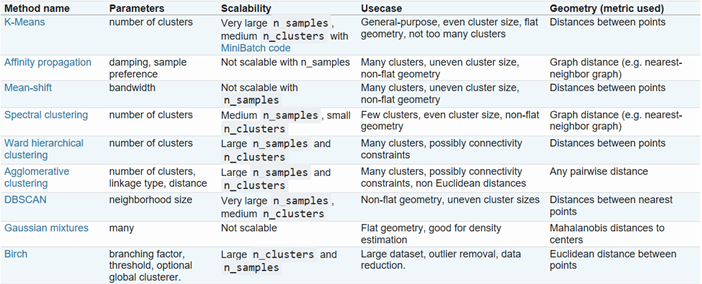

### 8.sklearn参数详解
接下来就通过查看sklearn的参数去完成自己的例子
https://sklearn.apachecn.org/docs/0.21.3/22.html

参考文献：
    